In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [ ]:
# Load the dataset
airlinedf = pd.read_csv("T_ONTIME_REPORTING.csv")

In [ ]:
airlinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611132 entries, 0 to 611131
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                611132 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  611132 non-null  int64  
 2   OP_CARRIER_FL_NUM      611132 non-null  int64  
 3   ORIGIN_AIRPORT_ID      611132 non-null  int64  
 4   ORIGIN_AIRPORT_SEQ_ID  611132 non-null  int64  
 5   ORIGIN_CITY_MARKET_ID  611132 non-null  int64  
 6   ORIGIN                 611132 non-null  object 
 7   DEST_AIRPORT_ID        611132 non-null  int64  
 8   DEST_AIRPORT_SEQ_ID    611132 non-null  int64  
 9   DEST_CITY_MARKET_ID    611132 non-null  int64  
 10  DEST                   611132 non-null  object 
 11  CRS_DEP_TIME           611132 non-null  int64  
 12  DEP_TIME               603699 non-null  float64
 13  DEP_DELAY              603676 non-null  float64
 14  DEP_DELAY_NEW          603676 non-nu

In [ ]:
print(airlinedf.isnull().sum())

FL_DATE                       0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
DEST                          0
CRS_DEP_TIME                  0
DEP_TIME                   7433
DEP_DELAY                  7456
DEP_DELAY_NEW              7456
TAXI_OUT                   7843
WHEELS_OFF                 7843
WHEELS_ON                  7994
TAXI_IN                    7994
CRS_ARR_TIME                  0
ARR_TIME                   7994
ARR_DELAY                  9860
ARR_DELAY_NEW              9860
CANCELLED                     0
CANCELLATION_CODE        603256
DIVERTED                      0
CRS_ELAPSED_TIME              0
ACTUAL_ELAPSED_TIME        9860
AIR_TIME                   9860
FLIGHTS                       0
DISTANCE                      0
CARRIER_

In [ ]:
pd.options.mode.copy_on_write = True
# Dropping rows with missing values for simplicity
airline = airlinedf.dropna(subset=['DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DISTANCE', 'CARRIER_DELAY'])

# Create a binary target variable: whether the flight was delayed on arrival (ARR_DELAY > 15 minutes)
airline.loc[:, 'DELAYED'] = np.where(airline['ARR_DELAY'] > 15, 1, 0)


In [ ]:
display(airline)

,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,DELAYED
0,6/1/2024 12:00:00 AM,19393,1,11259,1125904,30194,DAL,12191,1219103,31453,...,1.0,239.0,15.0,0.0,0.0,0.0,18.0,NaN,NaN,1
25,6/1/2024 12:00:00 AM,19393,1050,13495,1349505,33495,MSY,10821,1082106,30852,...,1.0,998.0,0.0,41.0,4.0,0.0,0.0,NaN,NaN,1
33,6/1/2024 12:00:00 AM,19393,1063,13931,1393102,33667,ORF,10821,1082106,30852,...,1.0,159.0,0.0,0.0,1.0,0.0,119.0,NaN,NaN,1
34,6/1/2024 12:00:00 AM,19393,107,11259,1125904,30194,DAL,10140,1014005,30140,...,1.0,580.0,0.0,0.0,0.0,0.0,31.0,NaN,NaN,1
35,6/1/2024 12:00:00 AM,19393,1070,14679,1467903,33570,SAN,11292,1129202,30325,...,1.0,853.0,1.0,0.0,0.0,0.0,126.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611112,6/30/2024 12:00:00 AM,20452,5838,11433,1143302,31295,DTW,14730,1473004,33044,...,1.0,306.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,1
611117,6/30/2024 12:00:00 AM,20452,5842,11278,1127805,30852,DCA,12478,1247805,31703,...,1.0,213.0,16.0,0.0,0.0,0.0,0.0,NaN,NaN,1
611121,6/30/2024 12:00:00 AM,20452,5847,11433,1143302,31295,DTW,11066,1106606,31066,...,1.0,155.0,177.0,0.0,7.0,0.0,0.0,NaN,NaN,1
611123,6/30/2024 12:00:00 AM,20452,5850,11433,1143302,31295,DTW,14321,1432105,34321,...,1.0,668.0,0.0,0.0,30.0,0.0,0.0,NaN,NaN,1


In [ ]:
airline.shape

(149945, 39)

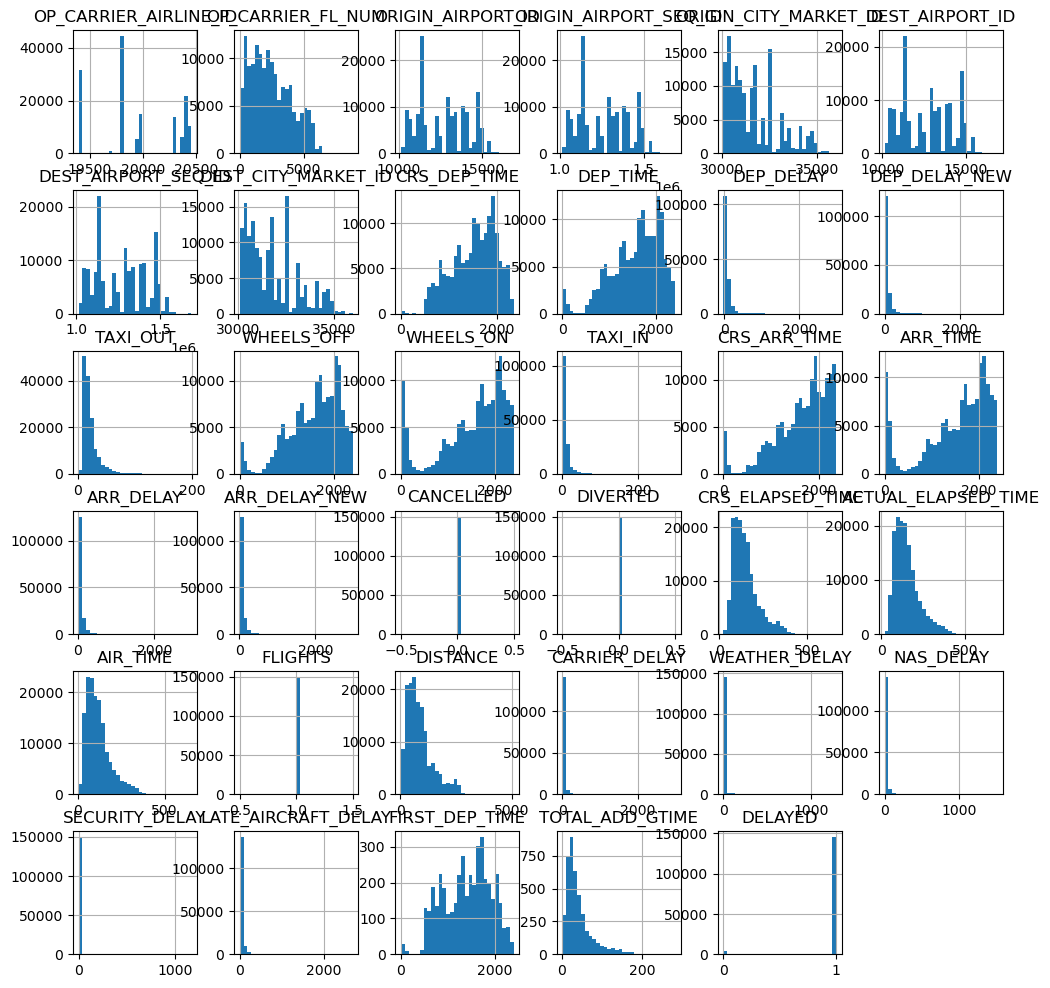

In [ ]:
airline.hist(bins = 30, figsize = (12, 12));

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


# Select features for prediction (adjust as needed)
X = airline[['DISTANCE', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY']]

# Fill NaNs with 0 for specific delay reasons
X = X.fillna(0)

# Target variable
y = airline['DELAYED']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_res = classification_report(y_test, y_pred, target_names=['On Time', 'Delayed'])

# Print the accuracy and classification report
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_res)

Random Forest Accuracy: 0.9858
Classification Report:
              precision    recall  f1-score   support

     On Time       0.81      0.69      0.75      1366
     Delayed       0.99      0.99      0.99     43618

    accuracy                           0.99     44984
   macro avg       0.90      0.84      0.87     44984
weighted avg       0.98      0.99      0.99     44984

